## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [21]:
df = pd.read_csv('data/Employee_Details.csv')

#### Show Top 5 Records

In [22]:
df.head()

,Unnamed: 0,Name,Address,Salary,DOJ,DOB,Age,Sex,Dependents,HRA,DA,PF,Gross Salary,Insurance,Marital Status,In Company Years,Year of Experience,Department,Position
0,0,VgwbPyBn,"jyNxKZtk St, piZQhYcARo, PUN 172813",149289.04,1998-04-27,1971-03-27,53,Other,2.0,8776.096,35233.666375,22142.724765,171156.077610,NaN,Widowed,26,32,Sales,Sales Director
1,1,pgdYaIWk,"PypVsqug St, iHyelKZbFc, BLR 580530",69761.64,2020-10-24,1997-12-12,26,Male,0.0,9302.836,16464.425985,10347.127918,85181.774067,Both,Single,3,5,Human Resources,HR Executive
2,2,eWgVBGVv,"pfQezTVa St, YfIaELfpUw, BLR 155186",107633.14,2020-07-22,1979-08-20,44,Female,2.0,13357.686,25402.468564,15964.273028,130429.021537,NaN,Divorced,3,23,Marketing,Senior Marketing Executive
3,3,LYDofRRu,"wcTsbmFr St, UdylzZFFCU, AMD 843852",147408.65,2007-03-27,1966-06-07,58,Male,1.0,6026.135,34789.876034,21863.823124,166360.837910,NaN,Married,17,37,Finance,Account Director
4,4,vhLFHcRg,"DdxKVhli St, cYOjpbMztB, BLR 713383",53447.06,2017-05-23,1992-11-19,31,Male,2.0,7554.294,12614.026326,7927.330359,65688.049967,Life,Married,7,10,Sales,Sales Executive


#### Shape of the dataset

In [23]:
df.shape

(5000, 19)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [24]:
df.isna().sum()

Unnamed: 0               0
Name                     0
Address                  0
Salary                   0
DOJ                      0
DOB                      0
Age                      0
Sex                      0
Dependents             123
HRA                      0
DA                       0
PF                       0
Gross Salary             0
Insurance             1238
Marital Status         123
In Company Years         0
Year of Experience       0
Department               0
Position                 0
dtype: int64

In [25]:
df.drop(columns=["Unnamed: 0", "Name", "Address", "DOJ", "DOB"], inplace=True)

# Fill missing values
df["Dependents"].fillna(df["Dependents"].median(), inplace=True)
df["Marital Status"].fillna(df["Marital Status"].mode()[0], inplace=True)
df["Insurance"].fillna("None", inplace=True)

In [26]:
df.isna().sum()

Salary                0
Age                   0
Sex                   0
Dependents            0
HRA                   0
DA                    0
PF                    0
Gross Salary          0
Insurance             0
Marital Status        0
In Company Years      0
Year of Experience    0
Department            0
Position              0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [27]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [28]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salary              5000 non-null   float64
 1   Age                 5000 non-null   int64  
 2   Sex                 5000 non-null   object 
 3   Dependents          5000 non-null   float64
 4   HRA                 5000 non-null   float64
 5   DA                  5000 non-null   float64
 6   PF                  5000 non-null   float64
 7   Gross Salary        5000 non-null   float64
 8   Insurance           5000 non-null   object 
 9   Marital Status      5000 non-null   object 
 10  In Company Years    5000 non-null   int64  
 11  Year of Experience  5000 non-null   int64  
 12  Department          5000 non-null   object 
 13  Position            5000 non-null   object 
dtypes: float64(6), int64(3), object(5)
memory usage: 547.0+ KB


### 3.4 Checking the number of unique values of each column

In [29]:
df.nunique()

Salary                4999
Age                     40
Sex                      3
Dependents               5
HRA                   5000
DA                    4999
PF                    4999
Gross Salary          5000
Insurance                4
Marital Status           4
In Company Years        41
Year of Experience      40
Department               5
Position                40
dtype: int64

### 3.5 Check statistics of data set

In [30]:
df.describe()

,Salary,Age,Dependents,HRA,DA,PF,Gross Salary,In Company Years,Year of Experience
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,93861.627080,40.378600,1.952600,7993.397892,22152.257486,13921.666148,110085.616310,9.794600,19.378600
std,33931.869545,11.293023,1.287744,2335.079683,8008.251450,5032.814519,37476.080169,8.833347,11.293023
min,15042.700000,21.000000,0.000000,3127.273000,3550.223601,2231.150832,22624.827875,-1.000000,0.000000
25%,70556.305000,30.000000,1.000000,6249.897000,16651.974659,10464.993559,85180.223458,3.000000,9.000000
50%,96270.790000,40.000000,2.000000,7713.330000,22720.843382,14278.996006,110617.024436,7.000000,19.000000
75%,121182.540000,50.000000,3.000000,9526.462500,28600.258832,17973.935860,141118.540075,15.000000,29.000000
max,149991.340000,60.000000,4.000000,14787.699000,35399.416010,22246.890721,173050.731289,39.000000,39.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [31]:
df.head()

,Salary,Age,Sex,Dependents,HRA,DA,PF,Gross Salary,Insurance,Marital Status,In Company Years,Year of Experience,Department,Position
0,149289.04,53,Other,2.0,8776.096,35233.666375,22142.724765,171156.077610,None,Widowed,26,32,Sales,Sales Director
1,69761.64,26,Male,0.0,9302.836,16464.425985,10347.127918,85181.774067,Both,Single,3,5,Human Resources,HR Executive
2,107633.14,44,Female,2.0,13357.686,25402.468564,15964.273028,130429.021537,None,Divorced,3,23,Marketing,Senior Marketing Executive
3,147408.65,58,Male,1.0,6026.135,34789.876034,21863.823124,166360.837910,None,Married,17,37,Finance,Account Director
4,53447.06,31,Male,2.0,7554.294,12614.026326,7927.330359,65688.049967,Life,Married,7,10,Sales,Sales Executive


In [32]:
print("Categories in 'Sex' variable:               ", df['Sex'].unique())
print("Categories in 'Insurance' variable:         ", df['Insurance'].unique())
print("Categories in 'Marital Status' variable:    ", df['Marital Status'].unique())
print("Categories in 'Department' variable:        ", df['Department'].unique())
print("Categories in 'Position' variable:          ", df['Position'].unique())


Categories in 'Sex' variable:                ['Other' 'Male' 'Female']
Categories in 'Insurance' variable:          ['None' 'Both' 'Life' 'Medical']
Categories in 'Marital Status' variable:     ['Widowed' 'Single' 'Divorced' 'Married']
Categories in 'Department' variable:         ['Sales' 'Human Resources' 'Marketing' 'Finance' 'IT']
Categories in 'Position' variable:           ['Sales Director' 'HR Executive' 'Senior Marketing Executive'
 'Account Director' 'Sales Executive' 'Regional Sales Manager'
 'National Account Head' 'Senior Executive' 'Technical Lead'
 'National Marketing Manager' 'IT Manager' 'Sales Representative'
 'Software Engineer II' 'National Sales Manager' 'Senior HR' 'ERP Head'
 'Senior Account Executive' 'Regional Marketing Manager' 'HR Director'
 'Marketing Intern' 'QA Lead' 'Regional Account Head' 'QA Engineer II'
 'Software Engineer III' 'Account Associate' 'Software Engineer I'
 'QA Engineer I' 'HR Associate' 'Marketing Director' 'Recruitment Manager'
 'Marketing

In [33]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Salary', 'Age', 'Dependents', 'HRA', 'DA', 'PF', 'Gross Salary', 'In Company Years', 'Year of Experience']

We have 5 categorical features : ['Sex', 'Insurance', 'Marital Status', 'Department', 'Position']


In [34]:
df.head(2)

,Salary,Age,Sex,Dependents,HRA,DA,PF,Gross Salary,Insurance,Marital Status,In Company Years,Year of Experience,Department,Position
0,149289.04,53,Other,2.0,8776.096,35233.666375,22142.724765,171156.077610,None,Widowed,26,32,Sales,Sales Director
1,69761.64,26,Male,0.0,9302.836,16464.425985,10347.127918,85181.774067,Both,Single,3,5,Human Resources,HR Executive


### 3.8 Adding columns for "Total Score" and "Average"

In [15]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [17]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

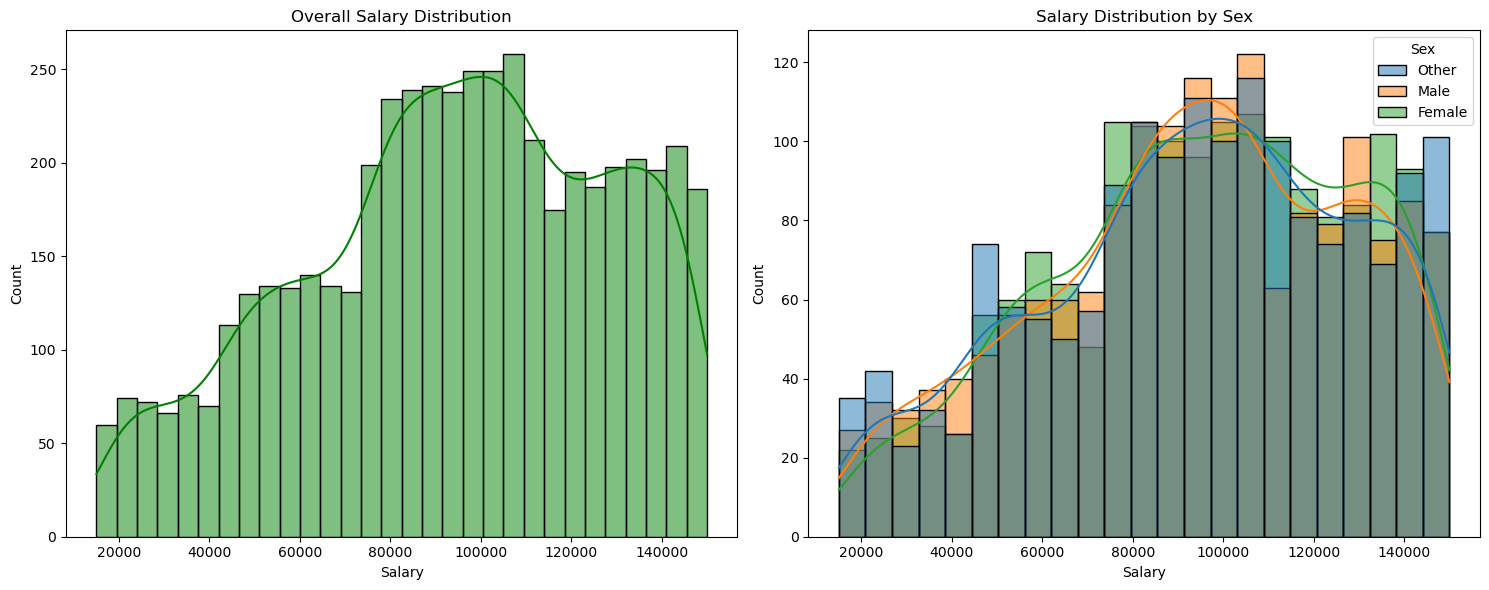

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subplot 1: Salary Distribution
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Left: Salary Distribution
sns.histplot(data=df, x='Salary', bins=30, kde=True, color='green', ax=axs[0])
axs[0].set_title("Overall Salary Distribution")

# Right: Salary Distribution by Sex
sns.histplot(data=df, x='Salary', kde=True, hue='Sex', ax=axs[1])
axs[1].set_title("Salary Distribution by Sex")

plt.tight_layout()
plt.show()


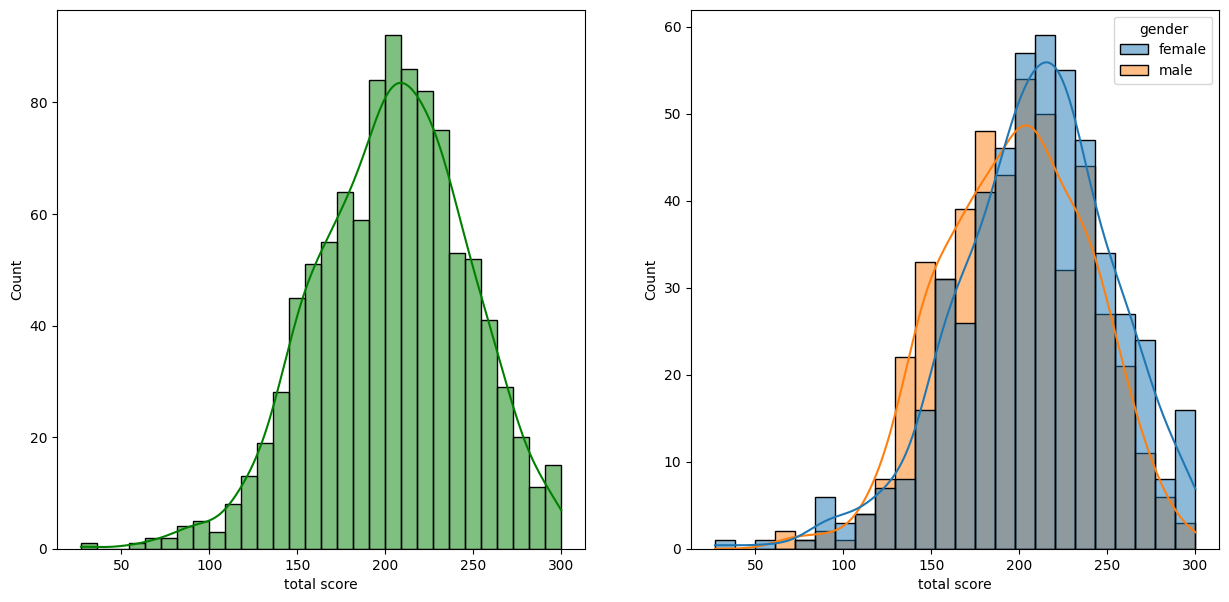

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

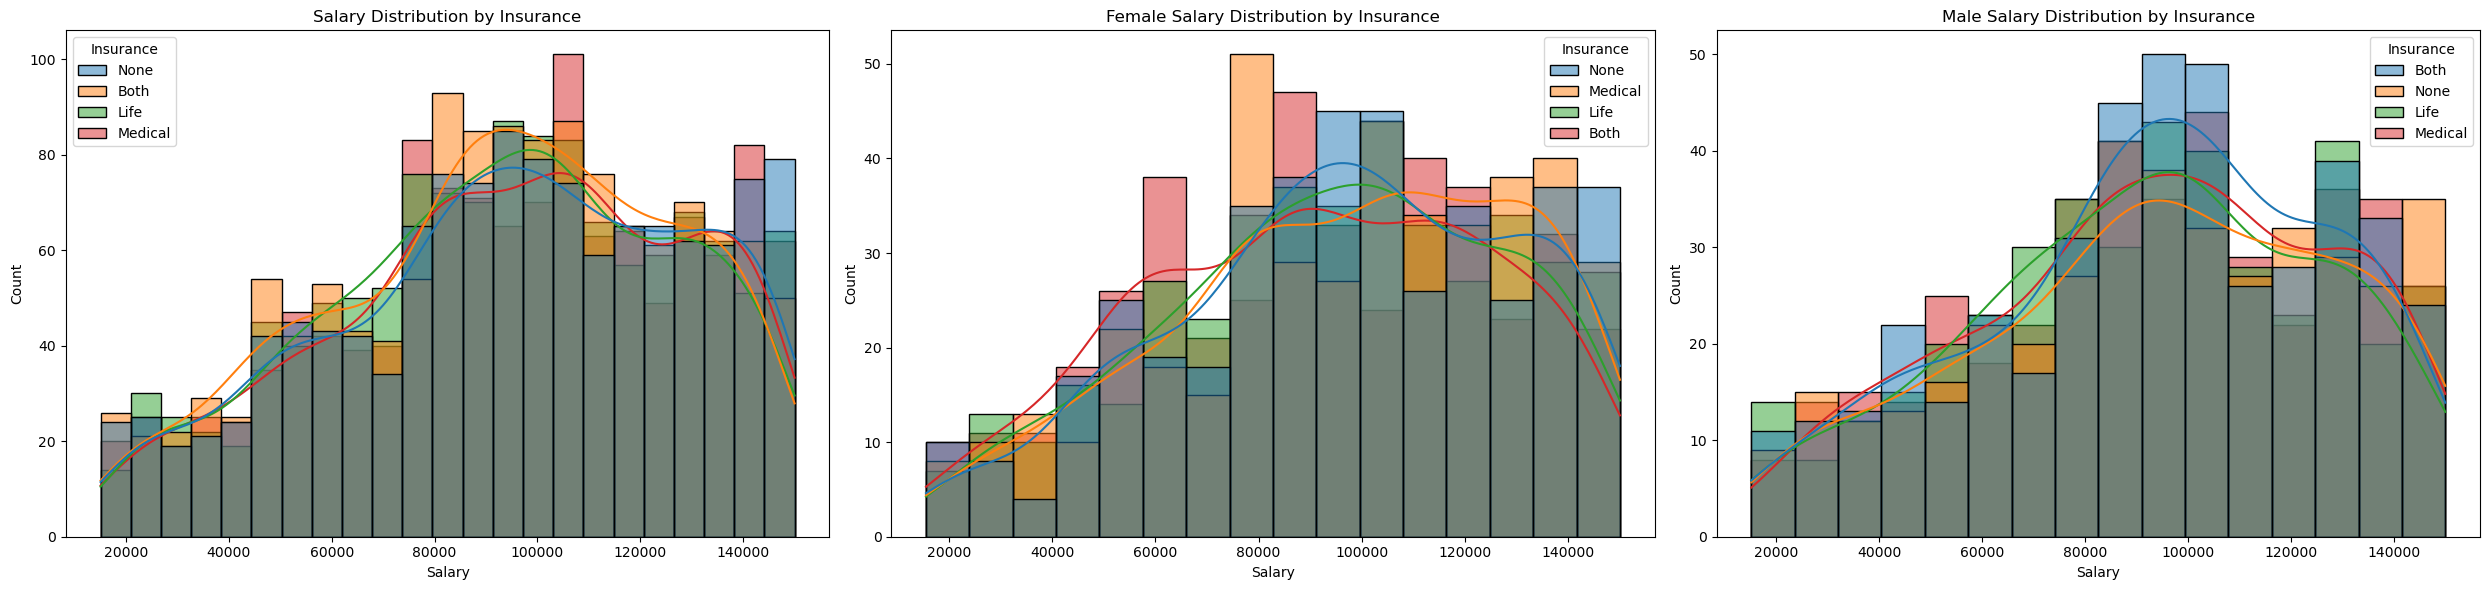

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 6))

# 1. Salary by Insurance (All)
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Salary', kde=True, hue='Insurance')
plt.title("Salary Distribution by Insurance")

# 2. Salary by Insurance (Female)
plt.subplot(1, 3, 2)
sns.histplot(data=df[df['Sex'] == 'Female'], x='Salary', kde=True, hue='Insurance')
plt.title("Female Salary Distribution by Insurance")

# 3. Salary by Insurance (Male)
plt.subplot(1, 3, 3)
sns.histplot(data=df[df['Sex'] == 'Male'], x='Salary', kde=True, hue='Insurance')
plt.title("Male Salary Distribution by Insurance")

plt.tight_layout()
plt.show()


#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

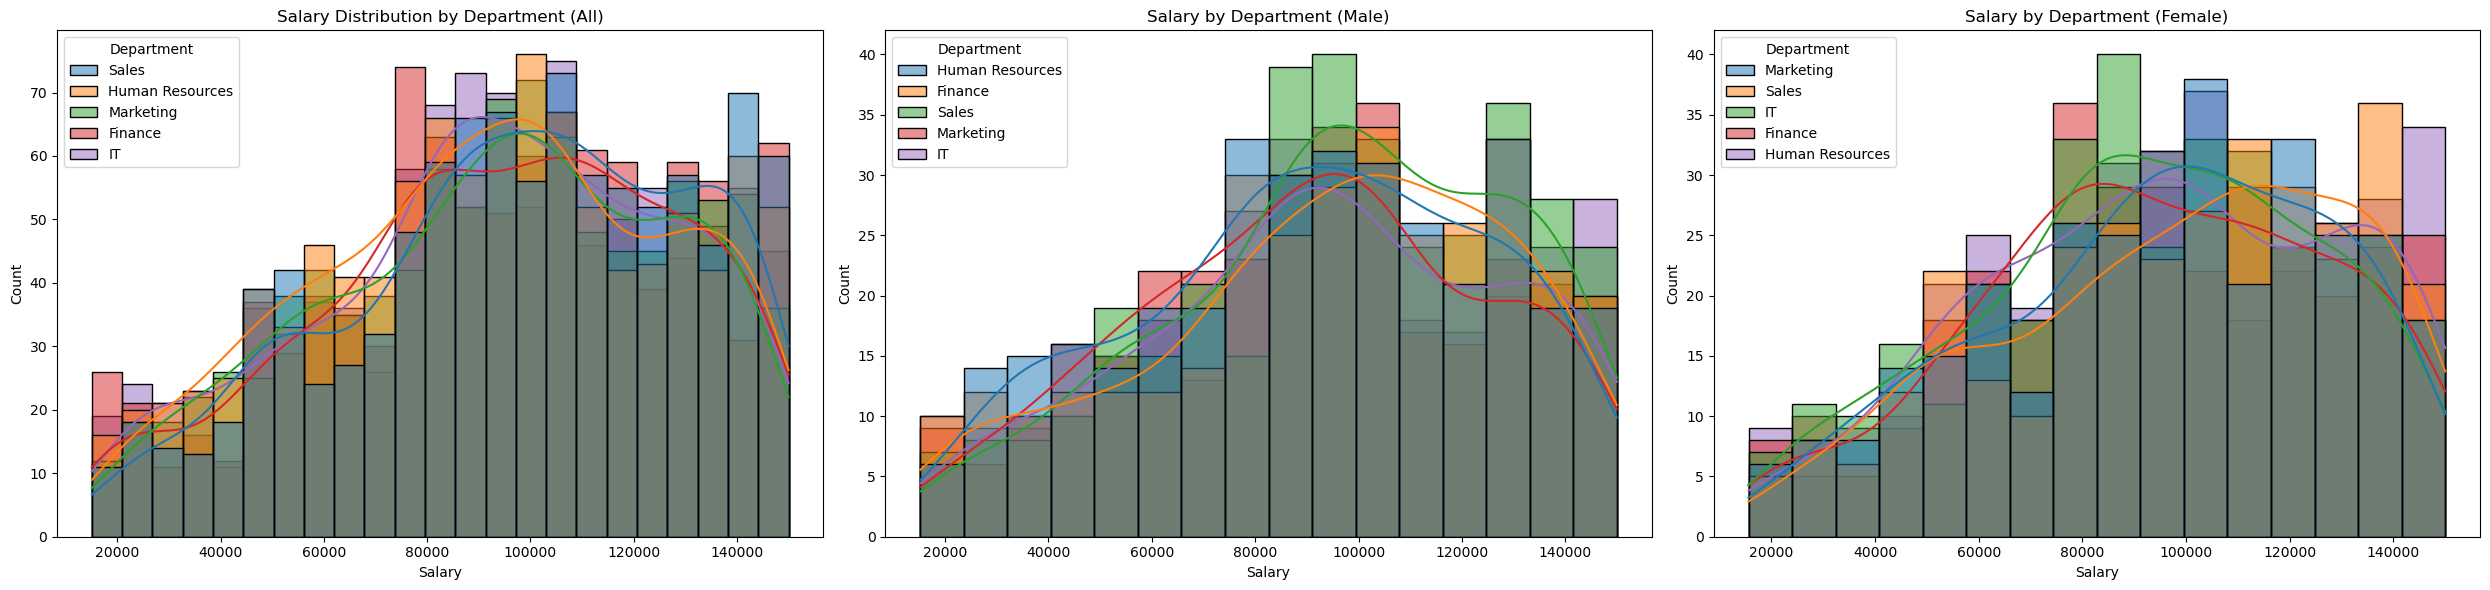

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 6))

# 1. All employees
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Salary', kde=True, hue='Department')
plt.title("Salary Distribution by Department (All)")

# 2. Male employees
plt.subplot(1, 3, 2)
sns.histplot(data=df[df['Sex'] == 'Male'], x='Salary', kde=True, hue='Department')
plt.title("Salary by Department (Male)")

# 3. Female employees
plt.subplot(1, 3, 3)
sns.histplot(data=df[df['Sex'] == 'Female'], x='Salary', kde=True, hue='Department')
plt.title("Salary by Department (Female)")

plt.tight_layout()
plt.show()


#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

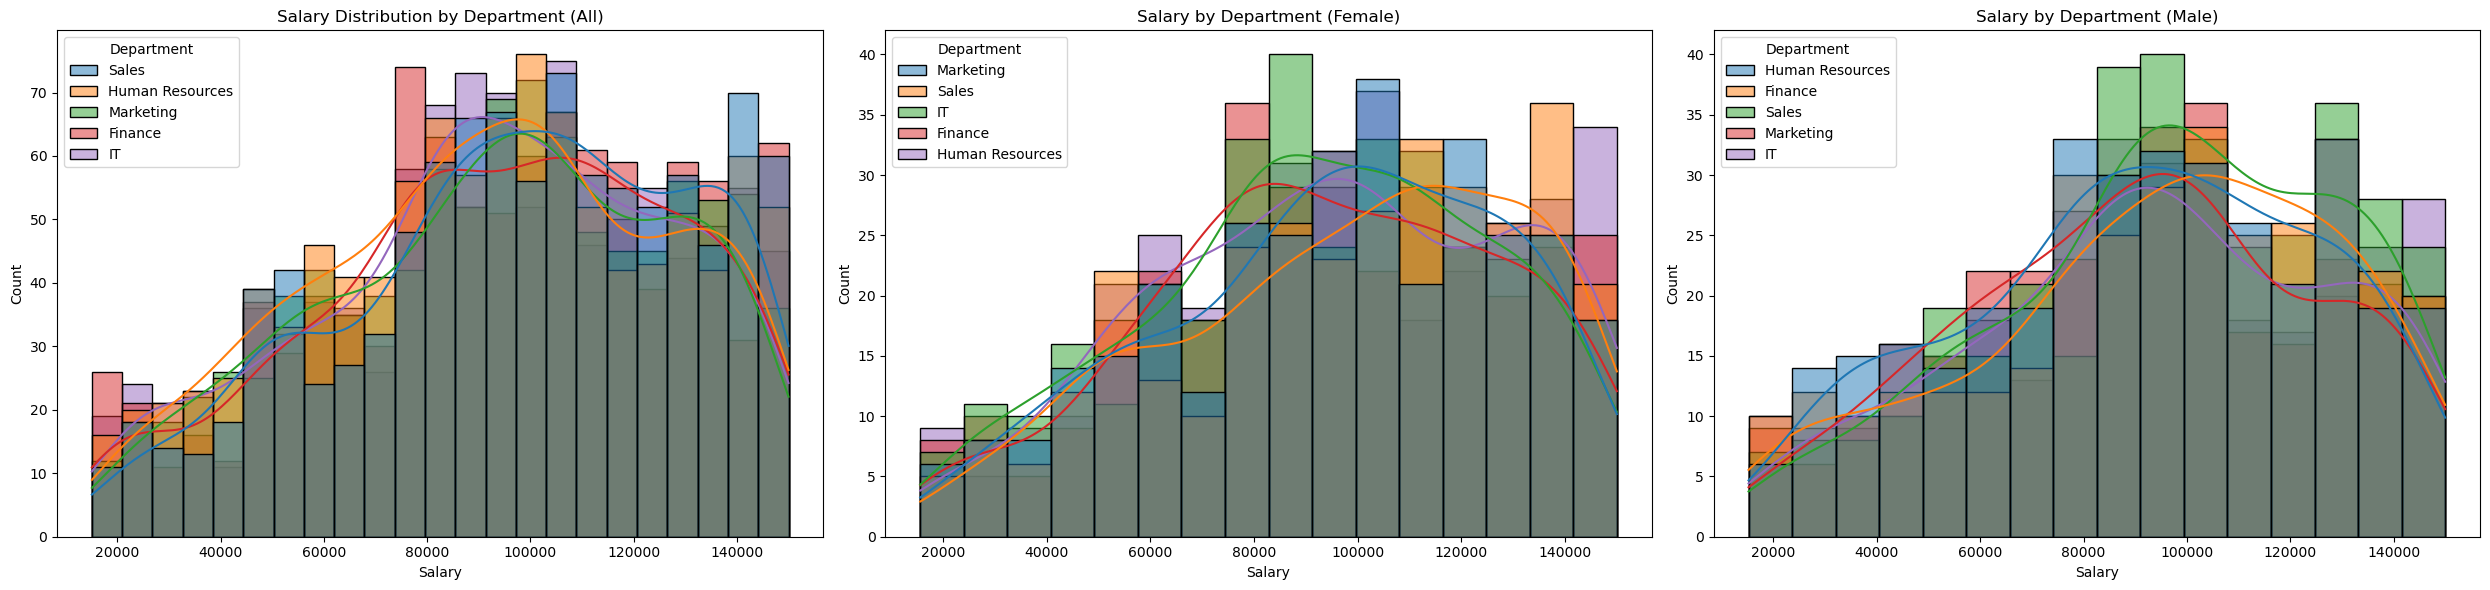

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 6))

# 1. All employees
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Salary', kde=True, hue='Department')
plt.title("Salary Distribution by Department (All)")

# 2. Female employees
plt.subplot(1, 3, 2)
sns.histplot(data=df[df['Sex'] == 'Female'], x='Salary', kde=True, hue='Department')
plt.title("Salary by Department (Female)")

# 3. Male employees
plt.subplot(1, 3, 3)
sns.histplot(data=df[df['Sex'] == 'Male'], x='Salary', kde=True, hue='Department')
plt.title("Salary by Department (Male)")

plt.tight_layout()
plt.show()


#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

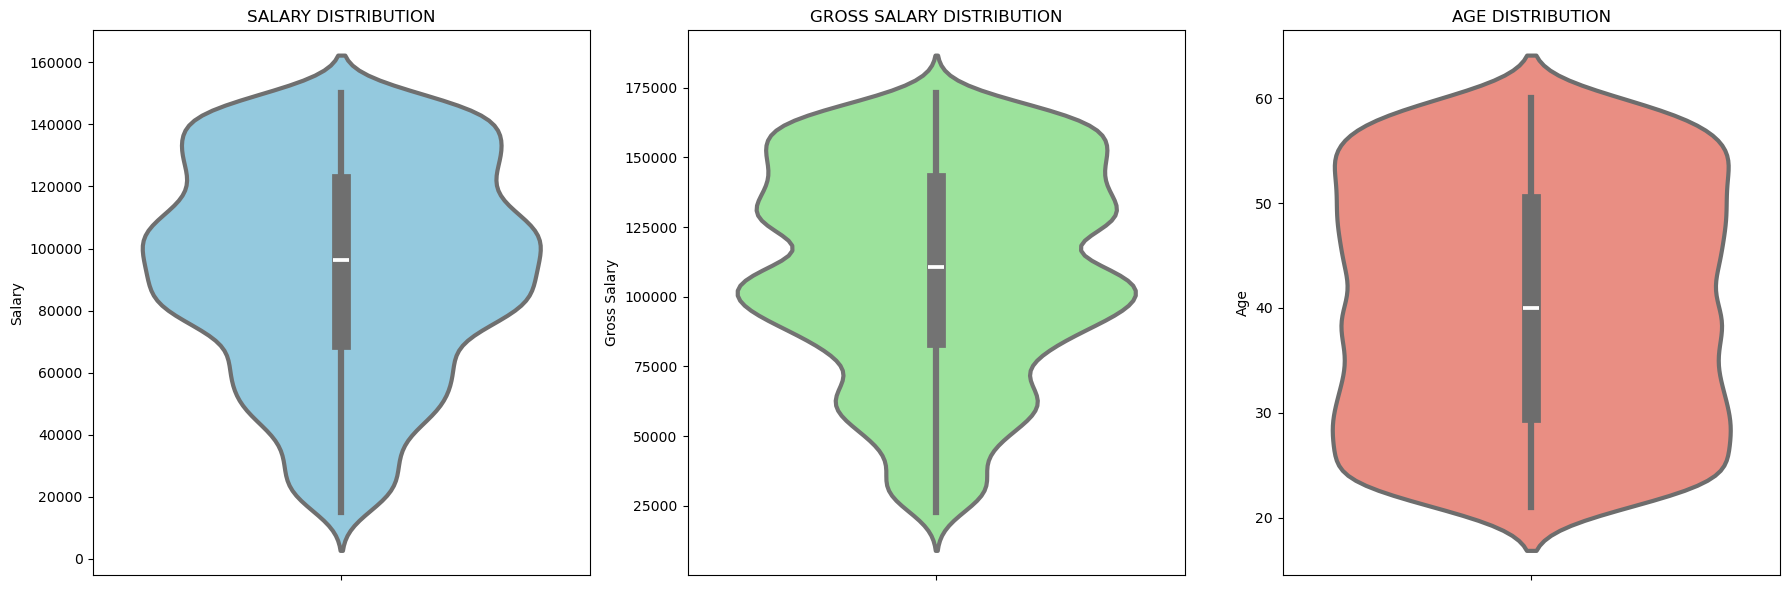

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# 1. Salary
plt.subplot(1, 3, 1)
plt.title('SALARY DISTRIBUTION')
sns.violinplot(y='Salary', data=df, color='skyblue', linewidth=3)

# 2. Gross Salary
plt.subplot(1, 3, 2)
plt.title('GROSS SALARY DISTRIBUTION')
sns.violinplot(y='Gross Salary', data=df, color='lightgreen', linewidth=3)

# 3. Age
plt.subplot(1, 3, 3)
plt.title('AGE DISTRIBUTION')
sns.violinplot(y='Age', data=df, color='salmon', linewidth=3)

plt.tight_layout()
plt.show()


#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

In [40]:
df.to_csv("data/cleaned_employee_data.csv", index=False)



#### 4.3 Multivariate analysis using pieplot

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [ ]:
gender_group = df.groupby('gender').mean()
gender_group

In [ ]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [ ]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [ ]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

In [ ]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.